# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aqu√≠](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. M√°s informaci√≥n sobre el dataset [aqu√≠](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploraci√≥n de datos y Procesamiento del Lenguaje Natural

Ded√≠cale un buen tiempo a hacer un An√°lisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, ser√° dif√≠cil completar este an√°lisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¬øqu√© palabras est√°n asociadas a calificaciones positivas y qu√© palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la cr√≠tica de un producto, asigne la cantidad de estrellas correspondiente.<br>
**Para pensar**: ¬øes un problema de Clasificaci√≥n o de Regresi√≥n?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Eval√∫a de forma apropiada sus resultados. Justifica la m√©trica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperpar√°metros de tu modelo.
1. Intenta responder la pregunta: ¬øQu√© informaci√≥n est√° usando el modelo para predecir?

**Recomendaci√≥n:** si no te resulta conveniente trabajar en espa√±ol con NLTK, te recomendamos que explores la librer√≠a [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¬øValdr√° la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar √∫nicamente las etiquetas Positiva y Negativa a cada cr√≠tica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qu√© situaci√≥n puede ser √∫til. ¬øEsperas que el desempe√±o sea mejor o peor?
1. ¬øHay algo que te gustar√≠a investigar o probar?

### **¬°T√≥mate tiempo para investigar y leer mucho!**

*Considero que el Proyecto podr√≠a entenderse como un problema de multi-clasificaci√≥n, donde cada clase corresponde a un valor de estrella. No ser√≠a del todo preciso usar regresi√≥n porque no buscamos valores continuos, sino m√°s bien discretos y que agrupen a las rese√±as seg√∫n el tipo de valoraci√≥n que representan.*

## Objetivo del Proyecto
Implementar un modelo para reconocer el puntaje asignado por un usuario a un item de Amazon  partir de su cr√≠tica.

## Desarrollo
#### Importamos las librer√≠as necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Garbage collector para optimizar recursos
import gc

#### Importamos el dataset de desarrollo

In [2]:
# Importamos dataset de desarrollo
data = pd.read_json("dataset_amazon/dataset_es_dev.json", lines = True)

In [17]:
# Importamos dataset de entrenamiento
data = pd.read_json("dataset_amazon/dataset_es_train.json", lines = True)

Exploramos el dataset para entender los datos:

In [3]:
data.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devoluci√≥n   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilic√© las brocas de menor di√°metro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

In [4]:
data.tail()

review_id          product_id          reviewer_id  stars  \
4995  es_0179515  product_es_0158275  reviewer_es_0273644      5   
4996  es_0894902  product_es_0953259  reviewer_es_0153773      5   
4997  es_0760496  product_es_0731995  reviewer_es_0171091      5   
4998  es_0178380  product_es_0402051  reviewer_es_0686937      5   
4999  es_0810087  product_es_0684221  reviewer_es_0613091      5   

                                            review_body    review_title  \
4995  Me ha encantado la cesta. Ha llegado impecable...       guadalupe   
4996                 Desempe√±a su funci√≥n correctamente  calidad precio   
4997  Me ha encantado la diadema! Las flores son tal...       Excelente   
4998  A mi me gustan mucho las fundas TPU, ya que so...          Genial   
4999  El art√≠culo ha cumplido con las expectativas q...   Buena calidad   

     language product_category  
4995       es             home  
4996       es           camera  
4997       es              toy  
4998       es         wireless  
4999       es          apparel

In [6]:
data.shape

(5000, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [24]:
# Para ver si hay nulos por columna
data.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

#### Importamos librer√≠as SpaCy y NLTK

Luego de investigar en la documentaci√≥n de SpaCy y NLTK para ver cu√°les stopwords eran m√°s convenientes, vi que [SpaCy](https://github.com/explosion/spaCy/blob/master/spacy/lang/es/stop_words.py) era m√°s completa que [NLTK](https://github.com/Alir3z4/stop-words/blob/bd8cc1434faeb3449735ed570a4a392ab5d35291/spanish.txt). Leyendo un poco sobre eso, descubr√≠ que est√°n sacadas del √°mbito de las noticias y por eso tienen m√°s vocabulario que forme parte de las 'stopwords'.

La librer√≠a NLTK es m√°s acotada pero cl√°sica, con palabras que bien podr√≠an saltearse en un procesamiento de lenguaje natural. Lo que s√≠, ambas tienen palabras que nos podr√≠an servir para predecir el valor de una rese√±a, como 'no', 'bueno', 'buena' y 'buen'.

Para este proyecto voy a elegir **SpaCy** por ser m√°s completa, pero no descarto la posibilidad de entrenarlo con las stopwords de NLTK para evaluar si mejora en algo.

Tambi√©n ir√© alternando de librer√≠as para los distintos procesos seg√∫n la facilidad con la que se pueda utilizar cada una.

In [5]:
# Previamente
## python -m spacy download es
## python -m spacy download es_core_news_sm

import spacy # https://spacy.io/usage/models
nlp = spacy.load('es_core_news_sm')

#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)

# Quitamos de las stopwords palabras como 'no', 'bueno', 'buena' que nos pueden ser √∫ltiles para predecir
stopwords_spacy.remove('no') # En los comentarios negativos es muy repetida
stopwords_spacy.remove('bueno')
stopwords_spacy.remove('buena')

In [6]:
import nltk

#Stop Words de nltk
from nltk.corpus import stopwords
stopwords_nltk = set(stopwords.words('spanish'))

# Quitamos de las stopwords la palabra 'no', que nos puede ser √∫ltil para predecir
stopwords_nltk.remove('no')

import re
from nltk.tokenize import RegexpTokenizer

### An√°lisis Exploratorio de Datos
#### Algunas preguntas que van surgiendo...
##### 1. ¬øCu√°ntos tipos de productos hay en el dataset?

In [7]:
data.product_category.value_counts()

wireless                    672
home                        659
toy                         332
sports                      331
home_improvement            299
pc                          273
electronics                 251
beauty                      195
automotive                  173
kitchen                     156
book                        142
drugstore                   137
furniture                   135
apparel                     133
baby_product                117
office_product              112
other                       103
luggage                     101
lawn_and_garden             101
pet_products                 89
personal_care_appliances     77
camera                       64
shoes                        60
digital_ebook_purchase       51
watch                        47
musical_instruments          46
video_games                  43
jewelry                      34
industrial_supplies          34
grocery                      33
Name: product_category, dtype: int64

##### 2. ¬øCu√°ntas rese√±as hay por cada estrella seg√∫n la categor√≠a?

In [8]:
data_grouped = data.review_id.groupby([data['product_category'],data['stars']]).count().astype(int).reset_index(name='count')
data_grouped

product_category  stars  count
0            apparel      1     20
1            apparel      2     30
2            apparel      3     36
3            apparel      4     26
4            apparel      5     21
..               ...    ...    ...
145         wireless      1    164
146         wireless      2    135
147         wireless      3    130
148         wireless      4    127
149         wireless      5    116

[150 rows x 3 columns]

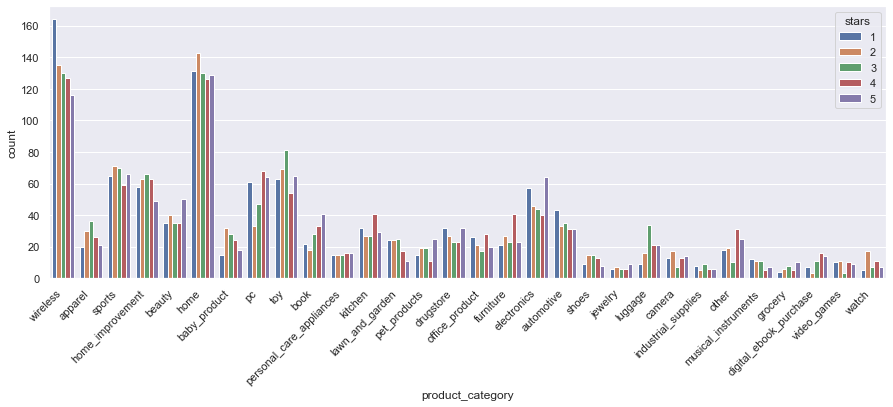

In [9]:
# Visualizaci√≥n
plt.figure(figsize=(15,5))
grafico = sns.countplot(x=data['product_category'],data=data, hue='stars')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

##### 3. ¬øCu√°l es el promedio de estrellas por cada categor√≠a? As√≠ es m√°s f√°cil visualizar. <br>
*La media deber√≠a dar alrededor de 3, pero aquellos que est√©n por debajo significa que fueron en su mayor√≠a peor calificados. Inversamente sucede con los que est√°n por encima de 3, lo que significa que fueron en su mayor√≠a muy bien calificados.*

In [10]:
from statistics import mean
data_grouped = data.stars.groupby([data['product_category']]).mean().reset_index(name='avg_stars')
data_grouped['rev_count'] = data.stars.groupby([data['product_category']]).count().astype(int).reset_index(name='rev_count').rev_count
data_grouped.sort_values(by='avg_stars')

product_category  avg_stars  rev_count
18       musical_instruments   2.652174         46
16           lawn_and_garden   2.673267        101
29                  wireless   2.845238        672
1                 automotive   2.849711        173
13       industrial_supplies   2.911765         34
27               video_games   2.930233         43
24                     shoes   2.933333         60
12          home_improvement   2.939799        299
19            office_product   2.955357        112
28                     watch   2.957447         47
26                       toy   2.966867        332
11                      home   2.968134        659
5                     camera   2.968750         64
25                    sports   2.969789        331
7                  drugstore   2.970803        137
2               baby_product   2.982906        117
0                    apparel   2.984962        133
8                electronics   3.031873        251
22  personal_care_appliances   3.038961         77
15                   kitchen   3.051282        156
3                     beauty   3.128205        195
9                  furniture   3.133333        135
23              pet_products   3.134831         89
14                   jewelry   3.147059         34
21                        pc   3.150183        273
20                     other   3.252427        103
17                   luggage   3.287129        101
10                   grocery   3.333333         33
4                       book   3.373239        142
6     digital_ebook_purchase   3.529412         51

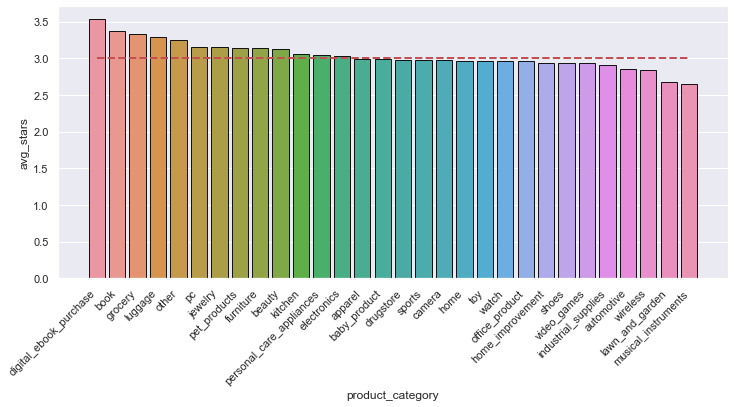

In [11]:
# Visualizaci√≥n de valoraci√≥n promedio por categor√≠a
data_grouped.sort_values(['avg_stars','rev_count'],ascending=False,inplace=True)
cte = np.ones(data_grouped.shape[0])*3 # Valor medio
plt.figure(figsize=(12,5))
grafico = sns.barplot(x=data_grouped.product_category, y=data_grouped.avg_stars, linewidth=0.9,edgecolor=(0,0,0))
plt.plot(cte, ls = '--', lw = 2, c='r',label = 'Valoraci√≥n media')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

##### 4. ¬øCu√°ntas reviews hay por cada valoraci√≥n?

In [23]:
data.stars.value_counts()

4    1000
1    1000
5    1000
2    1000
3    1000
Name: stars, dtype: int64

*Vemos que est√° equilibrada la cantidad de cada una.*

##### 5. ¬øCu√°ntos usuarios √∫nicos publicaron en este dataset?

In [12]:
# Ver cu√°ntos usuarios √∫nicos publicaron
unique_usrs = len(data.reviewer_id.unique())
print("De las", data.shape[0],"rese√±as,", unique_usrs, "fueron hechas por usuarios √∫nicos.")
print("Esto equivale al", unique_usrs/data.shape[0]*100,"%")

De las 5000 rese√±as, 4982 fueron hechas por usuarios √∫nicos.
Esto equivale al 99.64 %


##### 6. ¬øCu√°ntos productos √∫nicos aparecen en las rese√±as?

In [13]:
# Ver sobre cu√°ntos productos √∫nicos se publicaron rese√±as
unique_prods = len(data.product_id.unique())
print("De las", data.shape[0],"rese√±as, se mencionan", unique_prods , "productos √∫nicos.")
print("Esto equivale al", unique_prods/data.shape[0]*100,"%")

De las 5000 rese√±as, se mencionan 4964 productos √∫nicos.
Esto equivale al 99.28 %


##### 7. Tomamos como ejemplo un usuario y analizamos su actividad

In [14]:
# Vemos las rese√±as de un solo usuario
rand_idx = np.random.randint(0,data.shape[0])
usr = data.reviewer_id.iloc[rand_idx]
usr_data = data[data.reviewer_id == usr]
print("Cantidad de rese√±as del usuario", usr,":", len(usr_data))
print("Promedio de estrellas que ha dado:", usr_data.stars.mean())
usr_data[['reviewer_id','product_category','review_title','review_body','stars']]

Cantidad de rese√±as del usuario reviewer_es_0747606 : 1
Promedio de estrellas que ha dado: 3.0


reviewer_id product_category review_title  \
2134  reviewer_es_0747606             home    Se oxidan   

                                            review_body  stars  
2134  Funcionan bien, son de un tama√±o peque√±o y man...      3

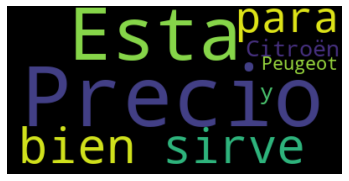

In [16]:
# pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(usr_data.review_title.iloc[0] + ' ' + usr_data.review_body.iloc[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 8. ¬øCu√°les son las palabras m√°s frecuentes por cada valoraci√≥n?
Para responder a esto neceitamos importar la librer√≠a NLTK para el procesamiento del lenguaje natural.

In [15]:
# Separamos en distintos dataframes las reviews seg√∫n valoraci√≥n
data_star_1 = data[data['stars']==1]
data_star_2 = data[data['stars']==2]
data_star_3 = data[data['stars']==3]
data_star_4 = data[data['stars']==4]
data_star_5 = data[data['stars']==5]

Empezamos analizando las reviews de 1 estrella:

In [16]:
todas_reviews_1 = []
for i in data_star_1.index:
    review1 = data_star_1.review_body[i] #seleccionar el titular
    sent = nlp(review1.lower())
    for token in sent:
        if (token.pos_ == "ADJ" and token not in stopwords_spacy):
            temp = token.lemma_
            todas_reviews_1.append(temp) #agregar el resultado a la lista

print('- Cantidad de palabras filtradas:',len(todas_reviews_1))
todas_reviews_1[:3]

- Cantidad de palabras filtradas: 1951


['malisimo', 'grande', 'aparatoso']

In [17]:
# Obtenemos frecuencia de palabras y creamos nuevo df
freq_rev_1 = nltk.FreqDist(todas_reviews_1)
df_rev_frec_1 = pd.DataFrame(freq_rev_1.items(), columns = ['Palabra', 'Frecuencia']) 
df_rev_frec_1.sort_values(by=['Frecuencia'], inplace=True, ascending=False)
df_rev_frec_1.reset_index(drop = True, inplace=True)
df_rev_frec_1.head()

Palabra  Frecuencia
0     malo          89
1  primero          48
2     roto          41
3  peque√±o          35
4     solo          33

In [18]:
# Vemos la parte inferior
df_rev_frec_1[df_rev_frec_1['Frecuencia']<10]

Palabra  Frecuencia
32   superior           9
33    dif√≠cil           9
34      negro           9
35   horrible           9
36    trasero           9
..        ...         ...
714  ampliado           1
715    saludo           1
716   estable           1
717     junto           1
718      poco           1

[687 rows x 2 columns]

##### Visualizamos la frecuencia de las palabras en las reviews de 1 estrella

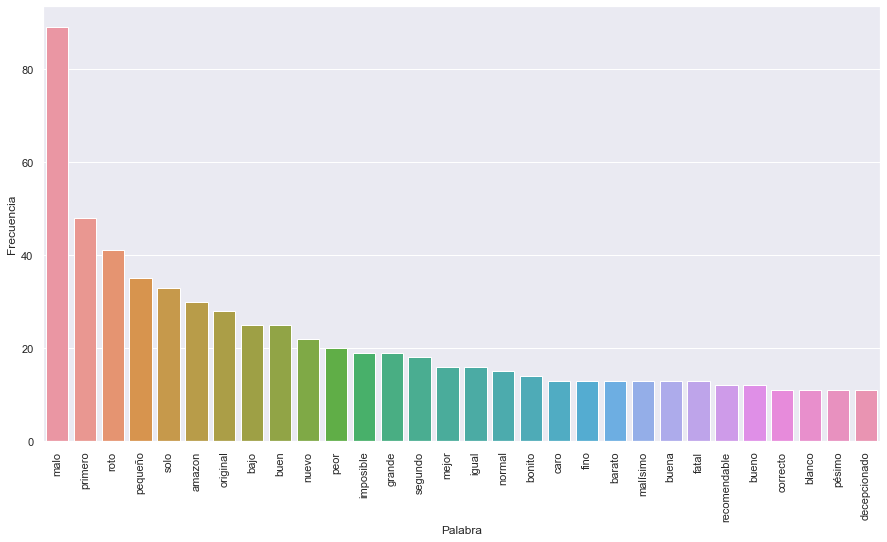

In [19]:
# Generamos gr√°fico con valores
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_1.iloc[:30].Palabra, y = df_rev_frec_1.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [31]:
from wordcloud import WordCloud

# Definimos funci√≥n para ver el wordcloud de una lista de palabras
def ver_wordcloud(palabras):
    text = ' '.join(palabras)
    wordcloud = WordCloud().generate(text.strip())
    plt.figure(figsize = (15,8), facecolor = None)
    plt.imshow(wordcloud, interpolation='kaiser')
    plt.axis("off")
    plt.show()

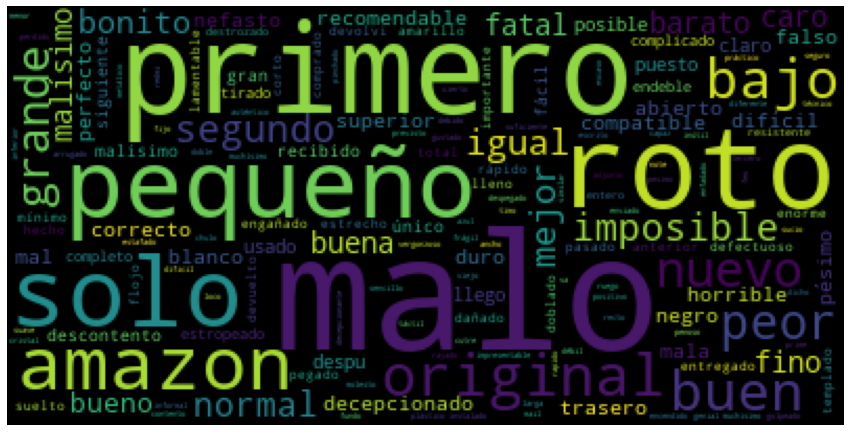

In [32]:
ver_wordcloud(todas_reviews_1)

*Palabras como 'Amazon', 'primero' y 'segundo' se repiten mucho pero no son relevantes.*

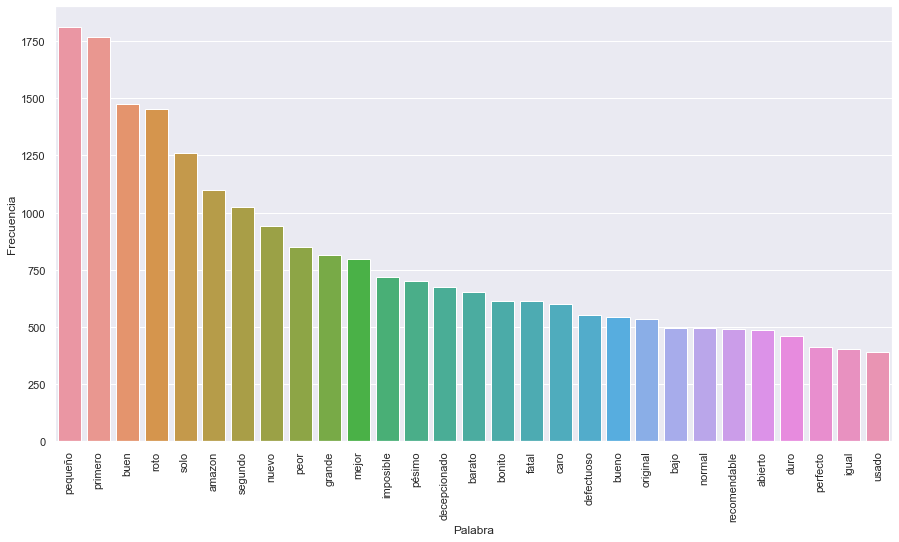

In [39]:
# Filtramos la palabra 'no' que es ampliamente m√°s frecuente para visualizar mejor
# plt.figure(figsize = (15,8))
# plot = sns.barplot(x  = df_rev_frec_1.iloc[1:30].Palabra, y = df_rev_frec_1.iloc[1:30].Frecuencia)
# for item in plot.get_xticklabels():
#    item.set_rotation(90)
# plt.show()

Para procesar los restantes dataframes, agrupamos todas las operaciones en una sola funci√≥n:

In [38]:
def adj_list(dataframe):
    todas_reviews = []
    for i in dataframe.index:
        review1 = dataframe.review_body[i] #seleccionar el titular
        sent = nlp(review1.lower())
        # review1 = RegexpTokenizer('\w+').tokenize(review1) # Tokenizar con RegexpTokenizer
        for token in sent:            
            if (token.pos_ == "ADJ" and str(token) not in stopwords_spacy):
                temp = token.lemma_
                todas_reviews.append(temp) #agregar el resultado a la lista
    return todas_reviews

def adj_frecquency_df(todas_reviews):
    # plain_todas_reviews = list(itertools.chain(*todas_reviews)) # Aplanar la lista
    freq_revs = nltk.FreqDist(todas_reviews) # Obtener frecuencia por palabra
    df_revs = pd.DataFrame(freq_revs.items(), columns = ['Palabra', 'Frecuencia']) # Crear nuevo df
    df_revs.sort_values(by=['Frecuencia'], inplace=True, ascending=False) # Ordenar valores por frecuencia
    df_revs.reset_index(drop = True, inplace=True) # Resetear index
    return df_revs

In [36]:
# Listamos los adjetivos de las reviews con 5 estrellas
todas_reviews_5 = adj_list(data_star_5)

In [39]:
df_rev_frec_5 = adj_frecquency_df(todas_reviews_5)
df_rev_frec_5

Palabra  Frecuencia
0                buen         170
1            perfecto         155
2              bonito          63
3               f√°cil          55
4              r√°pido          55
..                ...         ...
678       aconsejable           1
679       reflectante           1
680           mullida           1
681  higi√©nica.cumple           1
682         alucinado           1

[683 rows x 2 columns]

##### Visualizamos la frecuencia de las palabras en las reviews de 5 estrellas

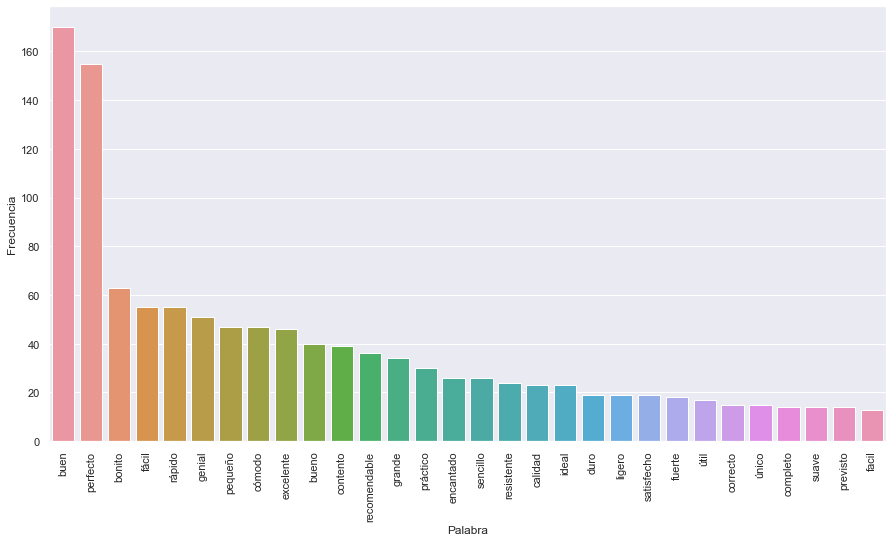

In [40]:
# Generamos gr√°fico con valores
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_5.iloc[:30].Palabra, y = df_rev_frec_5.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

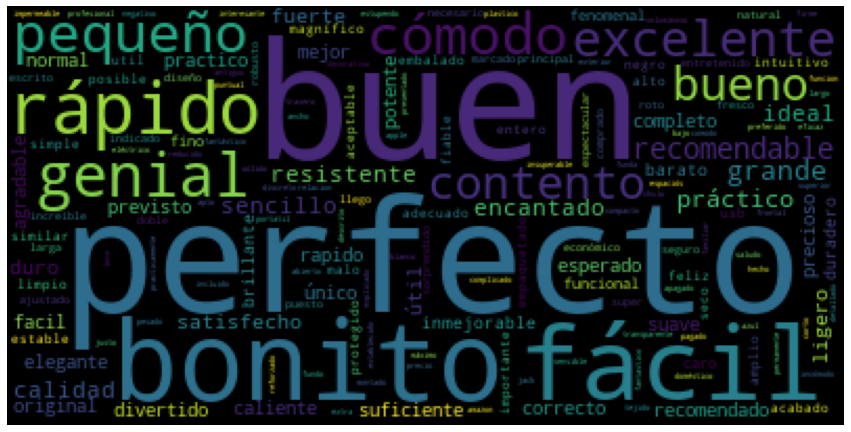

In [41]:
ver_wordcloud(todas_reviews_5)

In [42]:
# limpiamos memoria
gc.collect()

24130

### Preprocesamiento
#### Importamos el dataset de entrenamiento
Importamos dataset que ser√° utilizado para *train* y nos quedamos con las columnas relevantes.

In [44]:
# Set de entrenamiento
train_data = pd.read_json("dataset_amazon/dataset_es_train.json", lines = True)
train_df = train_data[['product_category','review_title','review_body','stars']]
train_df.head()

product_category                                       review_title  \
0      electronics                                   television Nevir   
1      electronics          Dinero tirado a la basura con esta compra   
2        drugstore  solo llega una unidad cuando te obligan a comp...   
3         wireless                              PRODUCTO NO RECIBIDO.   
4            shoes                                           Devuelto   

                                         review_body  stars  
0  Nada bueno se me fue ka pantalla en menos de 8...      1  
1  Horrible, nos tuvimos que comprar otro porque ...      1  
2  Te obligan a comprar dos unidades y te llega s...      1  
3  No entro en descalificar al vendedor, solo pue...      1  
4               Llega tarde y co la talla equivocada      1

In [45]:
print("- Cantidad de filas total del set de entrenamiento:", train_df.shape[0])
print("- Cantidad de filas nulas por columna:")
train_df.isna().sum()

- Cantidad de filas total del set de entrenamiento: 200000
- Cantidad de filas nulas por columna:


product_category    0
review_title        0
review_body         0
stars               0
dtype: int64

#### Importamos el dataset de prueba
Importamos dataset que ser√° utilizado para *test* y nos quedamos con las columnas relevantes.

In [47]:
test_data = pd.read_json("dataset_amazon/dataset_es_test.json", lines = True)
test_df = test_data[['product_category','review_title','review_body','stars']]
test_df.head()

product_category                               review_title  \
0                wireless                                no me llego   
1                    home   amazon sigue sin cumplir en las entregas   
2                     toy                         ESTAFA EN EL ENV√çO   
3                    home                           Estafa de Amazon   
4  digital_ebook_purchase  No consegu√≠ pasar de la portada en Kindle   

                                         review_body  stars  
0  no me llego el articulo me lo mando por correo...      1  
1              la mensajer√≠a horrible, no compro mas      1  
2  Estoy muy decepcionado con el vendedor ya que ...      1  
3  Mi valoraci√≥n no es sobre el producto sino sob...      1  
4  Pues ten√≠a inter√©s en este libro y prob√© la ve...      1

In [48]:
print("- Cantidad de filas total del set de prueba:", test_df.shape[0])
print("- Cantidad de filas nulas por columna:")
test_df.isna().sum()

- Cantidad de filas total del set de prueba: 5000
- Cantidad de filas nulas por columna:


product_category    0
review_title        0
review_body         0
stars               0
dtype: int64

Como el set de prueba es muy menor al set de entrenamiento (representa un 2,5% de los datos), vamos a juntar ambos datasets y con el `train_test_split` tomar un 30% para *test*.

Adem√°s, esto permite reducir la carga de entrenamiento.

In [ ]:
#df = pd.concat([train_df,test_df])
#df.tail()

#### Tokenizaci√≥n y Lemmatizaci√≥n

In [49]:
# Miramos una review al azar
random_index = np.random.randint(0,train_df.shape[0])
review = train_df.review_body.iloc[random_index]
title = train_df.review_title.iloc[random_index]
print(random_index, title, '\n',review)
print('- Valoraci√≥n:',train_df.stars[random_index])
print('- Categor√≠a:', train_df.product_category[random_index])

58810 No funciona. 
 En mi caso, y siguiendo claramente las instrucciones (mirando tambi√©n videos en YT) no me ha dado resultado. Se ha empapado la parte baja la guantera, ha olido bien durante la aplicaci√≥n, pero al d√≠a siguiente al utilizar el veh√≠culo y al poner la calefacci√≥n, continuaba el mal olor.
- Valoraci√≥n: 2
- Categor√≠a: automotive


In [50]:
# Mostramos las POS de la review elegida
sent = nlp(review)
for token in sent:
    print(token,"-",token.pos_)

En - ADP
mi - DET
caso - NOUN
, - PUNCT
y - CCONJ
siguiendo - VERB
claramente - ADV
las - DET
instrucciones - NOUN
( - PUNCT
mirando - VERB
tambi√©n - ADV
videos - NOUN
en - ADP
YT - PROPN
) - PUNCT
no - ADV
me - PRON
ha - AUX
dado - VERB
resultado - NOUN
. - PUNCT
Se - PRON
ha - AUX
empapado - VERB
la - DET
parte - NOUN
baja - ADJ
la - DET
guantera - NOUN
, - PUNCT
ha - AUX
olido - VERB
bien - ADV
durante - ADP
la - DET
aplicaci√≥n - NOUN
, - PUNCT
pero - CCONJ
al - ADP
d√≠a - NOUN
siguiente - ADJ
al - ADP
utilizar - VERB
el - DET
veh√≠culo - NOUN
y - CCONJ
al - ADP
poner - VERB
la - DET
calefacci√≥n - NOUN
, - PUNCT
continuaba - VERB
el - DET
mal - ADJ
olor - NOUN
. - PUNCT


In [51]:
# Visualizaci√≥n
# from spacy import displacy
# displacy.serve(sent, style="dep")

C:\Users\Luli\.conda\envs\datascience\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [52]:
# Tokens lemmatizados de la review elegida
for token in sent:
    print(token,"-",token.lemma_)

En - en
mi - mi
caso - caso
, - ,
y - y
siguiendo - seguir
claramente - claramente
las - el
instrucciones - instrucci√≥n
( - (
mirando - mirar
tambi√©n - tambi√©n
videos - video
en - en
YT - YT
) - )
no - no
me - yo
ha - haber
dado - dar
resultado - resultado
. - .
Se - √©l
ha - haber
empapado - empapar
la - el
parte - parte
baja - bajo
la - el
guantera - guantera
, - ,
ha - haber
olido - oler
bien - bien
durante - durante
la - el
aplicaci√≥n - aplicaci√≥n
, - ,
pero - pero
al - al
d√≠a - d√≠a
siguiente - siguiente
al - al
utilizar - utilizar
el - el
veh√≠culo - veh√≠culo
y - y
al - al
poner - poner
la - el
calefacci√≥n - calefacci√≥n
, - ,
continuaba - continuar
el - el
mal - mal
olor - olor
. - .


In [55]:
#Constante de signos de puntuaci√≥n
import string
puntua = string.punctuation + '¬°¬ø...'
excluded_pos = ['SCONJ','CCONJ','NUM','PUNCT','PRON','DET','ADP','AUX','X','PROPN']

#Funci√≥n para limpieza de datos
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [56]:
# Limpiamos la review escogida
clean_review = text_data_cleaning(review)
clean_review

['caso',
 'seguir',
 'claramente',
 'instrucci√≥n',
 'mirar',
 'video',
 'no',
 'resultado',
 'empapar',
 'bajo',
 'guantera',
 'oler',
 'aplicaci√≥n',
 'utilizar',
 'veh√≠culo',
 'calefacci√≥n',
 'continuar',
 'olor']

In [57]:
gc.collect()

136

In [58]:
# Limpiamos todas las reviews
clean_reviews = []
for i in train_df.index:
    rev = text_data_cleaning(train_df.review_title.iloc[i] + ' ' + train_df.review_body.iloc[i])
    #rev = [" ".join(w) for w in rev]
    clean_reviews.append(rev)

In [59]:
clean_reviews

[['t e l e v i s i o n',
  'n a d a',
  'b u e n o',
  'p a n t a l l a',
  'm e s',
  'n o',
  'r e c i b i r',
  'r e s p u e s t a',
  'f a b r i c a n t e'],
 ['t i r a d o',
  'b a s u r a',
  'c o m p r a',
  't e n e r',
  'c o m p r a r',
  'i n g l √© s',
  'i n f o r m √° t i c o',
  'h o r a',
  'c a p a z',
  'i n s t a l a r   √© l'],
 ['l l e g a r',
  'u n i d a d',
  'o b l i g a r',
  'c o m p r a r',
  'o b l i g a r',
  'c o m p r a r',
  'u n i d a d',
  'l l e g a r',
  'n o',
  'f o r m a',
  'r e c l a m a r',
  'a u t e n t i c o',
  'e s t a f a',
  'n o',
  'c o m p r e i'],
 ['n o',
  'n o',
  'e n t r o',
  'd e s c a l i f i c a r',
  'v e n d e d o r',
  'm e s',
  'e s p e r a',
  's e g u i r',
  'p r o d u c t o',
  't e n e r',
  'c o n t a c t a r',
  'r e c l a m a r',
  'r e e m b o l s o',
  'a m a z o n',
  'c a r g o',
  'p r o b l e m a',
  'd e s e m b o l s a r',
  'd i n e r o',
  'm e s',
  'd e v o l v e r',
  't o t a l',
  'p a l a b r a'

In [ ]:
# Agregamos columna al dataset
train_df['clean_rev'] = clean_reviews
train_df.head()

### Vectorizaci√≥n

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_test = TfidfVectorizer()

# Seleccionamos las columnas de inter√©s
df_lemm = train_df.loc[:,('clean_rev','stars')]
df_lemm.head()

In [ ]:
list_revs = list(df_lemm['clean_rev'].values)
stars = df_lemm['stars'].values
#stars
#list_revs = [" ".join(w) for w in list_revs] # Juntamos las palabras en un solo string por cada fila
#list_revs

In [ ]:
matriz_revs = tfidf.fit_transform(list_revs)
matriz_revs

In [ ]:
matriz_revs.toarray()

In [ ]:
# Tomamos las palabras
all_words = tfidf.get_feature_names()
print("Palabras m√°s usadas:",all_words[0:50])

In [ ]:
# Hacemos lo mismo con los datos de test
df_lemm = test_df.loc[:,('clean_rev','stars')]
list_test = list(df_lemm['clean_rev'].values)
matriz_test = tfidf_test.fit_transform(list_test)
stars_test = df_lemm['stars'].values

### Modelizaci√≥n

In [ ]:
X_train = matriz_revs.toarray()
y_train = stars
X_test = matriz_test.toarray()
y_test = stars_test

#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

print("acc : ", nb.score(X_test,y_test))

In [ ]:
y_pred = nb.predict(X_test)
confusion(y_test,y_pred)